In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import string
import warnings

In [5]:
## Smallest Difference between two Arrays
# import sys
# def findSmallestDifference(A, B, m, n):
#    A.sort()
#    B.sort()
#    a = 0
#    b = 0
#    # Initialize result as max value
#    result = sys.maxsize
#    # Scan Both Arrays upto
#    # sizeof of the Arrays
#    while (a < m and b < n):
#        if (abs(A[a] - B[b]) < result):
#            result = abs(A[a] - B[b])
#        # Move Smaller Value
#        if (A[a] < B[b]):
#            a += 1
#        else:
#            b += 1
#    # return final sma result
#    return result
import sys
def findSmallestDifference(A, B, m, n):
    result = sys.maxsize
    for a in np.arange(0,m,1):
        for b in np.arange(0,n,1):
            if (((A[a]-B[b])>0)&((A[a]-B[b])<result)):
                result = A[a]-B[b]
            elif (((B[b]-A[a])>0)&((B[b]-A[a])<result)):
                result = B[b]-A[a]
    return result

# pulling behavior analysis
## load behavioral results

In [36]:
## claim the list of sessions
animal1_name = "Dodson"
animal2_name = "Scorch"
self_session_days = ["20220909","20220912","20220914","20220915","20220916","20220919","20220920","20220921",
                     "20220922","20220923","20221010","20230103","20230206","20230208",
                     ]
mutual_session_days = ["20221011","20221013","20221014","20221015","20221017","20221018","20221019","20221020",
                       "20221021","20221022","20221024","20221025","20221026","20221028","20221029","20221030",
                       "20221101","20221102","20221103","20221104","20221105","20221107","20221108","20221109",
                       "20221202","20221205","20221206","20221207","20221208","20221209","20221212","20221214",
                       "20221216","20221219","20221220","20221221","20230105","20230109","20230110",
                       "20230111","20230112","20230130","20230201","20230202","20230203","20230209",
                       "20230213","20230214","20230216","20230217","20230223","20230227",
                       "20230301"]



n_self_sessions = np.shape(self_session_days)[0]
n_mutual_sessions = np.shape(mutual_session_days)[0]

In [37]:
# bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/"+self_session_days[-1]+"_"+animal1_name+"_"+animal2_name+"/"
# bhv_data_json = bhv_data_path+self_session_days[-1]+"_"+animal2_name+"_"+animal1_name+"_bhv_data_1.json"
# bhv_data = pd.read_json(bhv_data_json)
# bhv_data.head(20)

In [31]:
# load self session behavioral results
cumulative_pulls_animal1_self = {}
cumulative_pulls_animal2_self = {}

coop_pulls_num_1s_self = np.zeros([1,n_self_sessions])
coop_pulls_num_2s_self = np.zeros([1,n_self_sessions])
coop_pulls_num_3s_self = np.zeros([1,n_self_sessions])
succ_rate_all_self = np.zeros([1,n_self_sessions])
tasktypes_all_self = np.zeros([1,n_self_sessions])
coopthres_all_self = np.zeros([1,n_self_sessions])   
    
for ii in np.arange(0,n_self_sessions,1):
# for ii in np.arange(0,1,1):
    
    bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/"+self_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"/"
    try:
        trial_record_json = bhv_data_path+self_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"_TrialRecord_1.json"
        bhv_data_json = bhv_data_path+self_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"_bhv_data_1.json"
        session_info_json = bhv_data_path+self_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"_session_info_1.json"
        #
        trial_record = pd.read_json(trial_record_json)
        bhv_data = pd.read_json(bhv_data_json)
        session_info = pd.read_json(session_info_json)
    except:
        trial_record_json = bhv_data_path+self_session_days[ii]+"_"+animal2_name+"_"+animal1_name+"_TrialRecord_1.json"
        bhv_data_json = bhv_data_path+self_session_days[ii]+"_"+animal2_name+"_"+animal1_name+"_bhv_data_1.json"
        session_info_json = bhv_data_path+self_session_days[ii]+"_"+animal2_name+"_"+animal1_name+"_session_info_1.json"
        #
        trial_record = pd.read_json(trial_record_json)
        bhv_data = pd.read_json(bhv_data_json)
        session_info = pd.read_json(session_info_json)
        
    #
    animal1 = session_info['lever1_animal'][0].lower()
    animal2 = session_info['lever2_animal'][0].lower()
    #
    # clean up the trial_record
    warnings.filterwarnings('ignore')
    trial_record_clean = pd.DataFrame(columns=trial_record.columns)
    for itrial in np.arange(0,np.max(trial_record['trial_number']),1):
        # trial_record_clean.loc[itrial] = trial_record[trial_record['trial_number']==itrial+1].iloc[[0]]
        trial_record_clean = trial_record_clean.append(trial_record[trial_record['trial_number']==itrial+1].iloc[[0]])
    trial_record_clean = trial_record_clean.reset_index(drop = True)
    #
    # change bhv_data time to the absolute time
    time_points_new = pd.DataFrame(np.zeros(np.shape(bhv_data)[0]),columns=["time_points_new"])
    for itrial in np.arange(0,np.max(trial_record_clean['trial_number']),1):
        ind = bhv_data["trial_number"]==itrial+1
        new_time_itrial = bhv_data[ind]["time_points"] + trial_record_clean["trial_starttime"].iloc[itrial]
        time_points_new["time_points_new"][ind] = new_time_itrial
    ind = bhv_data["trial_number"]>np.max(trial_record_clean['trial_number'])
    bhv_data["time_points"] = time_points_new["time_points_new"]
    bhv_data = bhv_data.drop(np.where(ind)[0])
    
    animal1_pulltime = bhv_data["time_points"][bhv_data["behavior_events"]==1].reset_index(drop=True)
    animal2_pulltime = bhv_data["time_points"][bhv_data["behavior_events"]==2].reset_index(drop=True)
    
    if (animal1 == animal1_name.lower()):
        cumulative_pulls_animal1_self[self_session_days[ii]] = animal1_pulltime
        cumulative_pulls_animal2_self[self_session_days[ii]] = animal2_pulltime
    elif (animal1 == animal2_name.lower()):
        cumulative_pulls_animal1_self[self_session_days[ii]] = animal2_pulltime
        cumulative_pulls_animal2_self[self_session_days[ii]] = animal1_pulltime
        
        
    #    
    #    
    # count the cooperative pull numbers
    for itrial in np.arange(0,np.max(bhv_data['trial_number']),1):
        ind1 = (bhv_data["trial_number"]==itrial+1) & (bhv_data["behavior_events"]==1)
        itimepoint_1 = bhv_data[ind1]["time_points"].reset_index(drop=True)
        itimepoint_1 = pd.Series.to_list(itimepoint_1)
        ind2 = (bhv_data["trial_number"]==itrial+1) & (bhv_data["behavior_events"]==2)
        itimepoint_2 = bhv_data[ind2]["time_points"].reset_index(drop=True)
        itimepoint_2 = pd.Series.to_list(itimepoint_2)
        #if ((len(itimepoint_1)>0) & (len(itimepoint_2)>0)):
        pull_diff = findSmallestDifference(itimepoint_1, itimepoint_2, len(itimepoint_1), len(itimepoint_2))
        if (pull_diff<=3):
            coop_pulls_num_3s_self[0][ii] = coop_pulls_num_3s_self[0][ii]+1
        if (pull_diff<=2):
            coop_pulls_num_2s_self[0][ii] = coop_pulls_num_2s_self[0][ii]+1
        if (pull_diff<=1.06):
            coop_pulls_num_1s_self[0][ii] = coop_pulls_num_1s_self[0][ii]+1
    coop_pulls_num_3s_self[0][ii] = 2*coop_pulls_num_3s_self[0][ii]/(np.sum(bhv_data["behavior_events"]==1)+np.sum(bhv_data["behavior_events"]==2))
    coop_pulls_num_2s_self[0][ii] = 2*coop_pulls_num_2s_self[0][ii]/(np.sum(bhv_data["behavior_events"]==1)+np.sum(bhv_data["behavior_events"]==2))
    coop_pulls_num_1s_self[0][ii] = 2*coop_pulls_num_1s_self[0][ii]/(np.sum(bhv_data["behavior_events"]==1)+np.sum(bhv_data["behavior_events"]==2))
    
    succ_rate_all_self[0][ii] = np.sum((bhv_data['behavior_events']==3)|(bhv_data['behavior_events']==4))/np.sum((bhv_data['behavior_events']==1)|(bhv_data['behavior_events']==2))
    
    # get task type and cooperation threshold
    try:
        coop_thres = session_info["pulltime_thres"][0]
        tasktype = session_info["task_type"][0]
    except:
        coop_thres = 0
        tasktype = 1
    tasktypes_all_self[0][ii] = tasktype
    coopthres_all_self[0][ii] = coop_thres      

In [38]:

# load mutual cooperation session behavioral results
cumulative_pulls_animal1_mutual = {}
cumulative_pulls_animal2_mutual = {}

coop_pulls_num_1s_mutual = np.zeros([1,n_mutual_sessions])
coop_pulls_num_2s_mutual = np.zeros([1,n_mutual_sessions])
coop_pulls_num_3s_mutual = np.zeros([1,n_mutual_sessions])

succ_rate_all_mutual = np.zeros([1,n_mutual_sessions])
tasktypes_all_mutual = np.zeros([1,n_mutual_sessions])
coopthres_all_mutual = np.zeros([1,n_mutual_sessions])   

for ii in np.arange(0,n_mutual_sessions,1):
    
    bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/"+mutual_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"/"
    try:
        trial_record_json = bhv_data_path+mutual_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"_TrialRecord_1.json"
        bhv_data_json = bhv_data_path+mutual_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"_bhv_data_1.json"
        session_info_json = bhv_data_path+mutual_session_days[ii]+"_"+animal1_name+"_"+animal2_name+"_session_info_1.json"
        #
        trial_record = pd.read_json(trial_record_json)
        bhv_data = pd.read_json(bhv_data_json)
        session_info = pd.read_json(session_info_json)
    except:
        trial_record_json = bhv_data_path+mutual_session_days[ii]+"_"+animal2_name+"_"+animal1_name+"_TrialRecord_1.json"
        bhv_data_json = bhv_data_path+mutual_session_days[ii]+"_"+animal2_name+"_"+animal1_name+"_bhv_data_1.json"
        session_info_json = bhv_data_path+mutual_session_days[ii]+"_"+animal2_name+"_"+animal1_name+"_session_info_1.json"
        #
        trial_record = pd.read_json(trial_record_json)
        bhv_data = pd.read_json(bhv_data_json)
        session_info = pd.read_json(session_info_json)
        
    #
    animal1 = session_info['lever1_animal'][0].lower()
    animal2 = session_info['lever2_animal'][0].lower()
    #
    # clean up the trial_record
    warnings.filterwarnings('ignore')
    trial_record_clean = pd.DataFrame(columns=trial_record.columns)
    for itrial in np.arange(0,np.max(trial_record['trial_number']),1):
        # trial_record_clean.loc[itrial] = trial_record[trial_record['trial_number']==itrial+1].iloc[[0]]
        trial_record_clean = trial_record_clean.append(trial_record[trial_record['trial_number']==itrial+1].iloc[[0]])
    trial_record_clean = trial_record_clean.reset_index(drop = True)
    #
    # change bhv_data time to the absolute time
    time_points_new = pd.DataFrame(np.zeros(np.shape(bhv_data)[0]),columns=["time_points_new"])
    for itrial in np.arange(0,np.max(trial_record_clean['trial_number']),1):
        ind = bhv_data["trial_number"]==itrial+1
        new_time_itrial = bhv_data[ind]["time_points"] + trial_record_clean["trial_starttime"].iloc[itrial]
        time_points_new["time_points_new"][ind] = new_time_itrial
    ind = bhv_data["trial_number"]>np.max(trial_record_clean['trial_number'])
    bhv_data["time_points"] = time_points_new["time_points_new"]
    bhv_data = bhv_data.drop(np.where(ind)[0])
       
    # save pulling time for cumulative pulls 
    animal1_pulltime = bhv_data["time_points"][bhv_data["behavior_events"]==1].reset_index(drop=True)
    animal2_pulltime = bhv_data["time_points"][bhv_data["behavior_events"]==2].reset_index(drop=True)
    
    if (animal1 == animal1_name.lower()):
        cumulative_pulls_animal1_mutual[mutual_session_days[ii]] = animal1_pulltime
        cumulative_pulls_animal2_mutual[mutual_session_days[ii]] = animal2_pulltime
    elif (animal1 == animal2_name.lower()):
        cumulative_pulls_animal1_mutual[mutual_session_days[ii]] = animal2_pulltime
        cumulative_pulls_animal2_mutual[mutual_session_days[ii]] = animal1_pulltime
        
    #    
    #    
    # count the cooperative pull numbers
    for itrial in np.arange(0,np.max(bhv_data['trial_number']),1):
        ind1 = (bhv_data["trial_number"]==itrial+1) & (bhv_data["behavior_events"]==1)
        itimepoint_1 = bhv_data[ind1]["time_points"].reset_index(drop=True)
        itimepoint_1 = pd.Series.to_list(itimepoint_1)
        ind2 = (bhv_data["trial_number"]==itrial+1) & (bhv_data["behavior_events"]==2)
        itimepoint_2 = bhv_data[ind2]["time_points"].reset_index(drop=True)
        itimepoint_2 = pd.Series.to_list(itimepoint_2)
        # if ((len(itimepoint_1)>0) & (len(itimepoint_2)>0)):
        pull_diff = findSmallestDifference(itimepoint_1, itimepoint_2, len(itimepoint_1), len(itimepoint_2))
        if (pull_diff<=3):
            coop_pulls_num_3s_mutual[0][ii] = coop_pulls_num_3s_mutual[0][ii]+1
        if (pull_diff<=2):
            coop_pulls_num_2s_mutual[0][ii] = coop_pulls_num_2s_mutual[0][ii]+1
        if (pull_diff<=1):
            coop_pulls_num_1s_mutual[0][ii] = coop_pulls_num_1s_mutual[0][ii]+1
    coop_pulls_num_3s_mutual[0][ii] = 2*coop_pulls_num_3s_mutual[0][ii]/(np.sum(bhv_data["behavior_events"]==1)+np.sum(bhv_data["behavior_events"]==2))
    coop_pulls_num_2s_mutual[0][ii] = 2*coop_pulls_num_2s_mutual[0][ii]/(np.sum(bhv_data["behavior_events"]==1)+np.sum(bhv_data["behavior_events"]==2))
    coop_pulls_num_1s_mutual[0][ii] = 2*coop_pulls_num_1s_mutual[0][ii]/(np.sum(bhv_data["behavior_events"]==1)+np.sum(bhv_data["behavior_events"]==2))
    
    succ_rate_all_mutual[0][ii] = np.sum((bhv_data['behavior_events']==3)|(bhv_data['behavior_events']==4))/np.sum((bhv_data['behavior_events']==1)|(bhv_data['behavior_events']==2))
        
    # get task type and cooperation threshold
    try:
        coop_thres = session_info["pulltime_thres"][0]
        tasktype = session_info["task_type"][0]
    except:
        coop_thres = 0
        tasktype = 1
    tasktypes_all_mutual[0][ii] = tasktype
    coopthres_all_mutual[0][ii] = coop_thres      

## plot behavioral results 
### cumulative pulling results - separating conditions

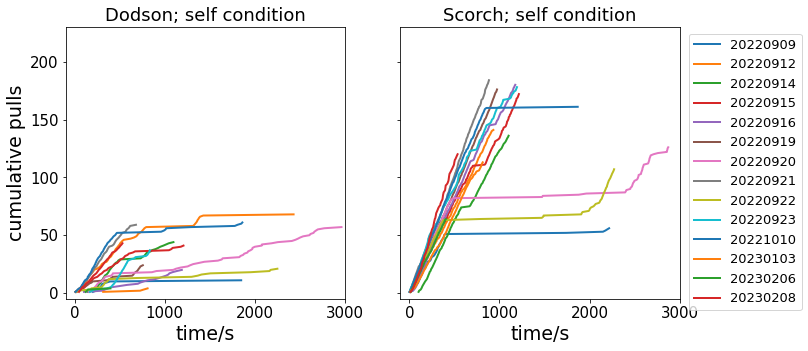

In [40]:
# plot for self condition
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(11)
#
for ii in np.arange(0,n_self_sessions,1):
    xxx = cumulative_pulls_animal1_self[self_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal1_self[self_session_days[ii]])[0]+1,1)
    axs[0].plot(xxx,yyy,linewidth=2)
    xxx = cumulative_pulls_animal2_self[self_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal2_self[self_session_days[ii]])[0]+1,1)
    axs[1].plot(xxx,yyy,linewidth=2)
axs[0].set_title(animal1_name+"; self condition",fontsize = 18)
axs[0].set_ylim([-5,230])
axs[0].set_xlim([-100,3000])
axs[0].set_xlabel("time/s",fontsize = 19)
axs[0].set_ylabel("cumulative pulls",fontsize = 19)
axs[0].tick_params(labelsize = 15)
axs[1].set_title(animal2_name+"; self condition",fontsize = 18)    
axs[1].set_ylim([-5,230])
axs[1].set_xlim([-100,3000])
axs[1].set_xlabel("time/s",fontsize = 19)
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=self_session_days, fontsize = 13,bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig("cumulative_pulling_self.png")

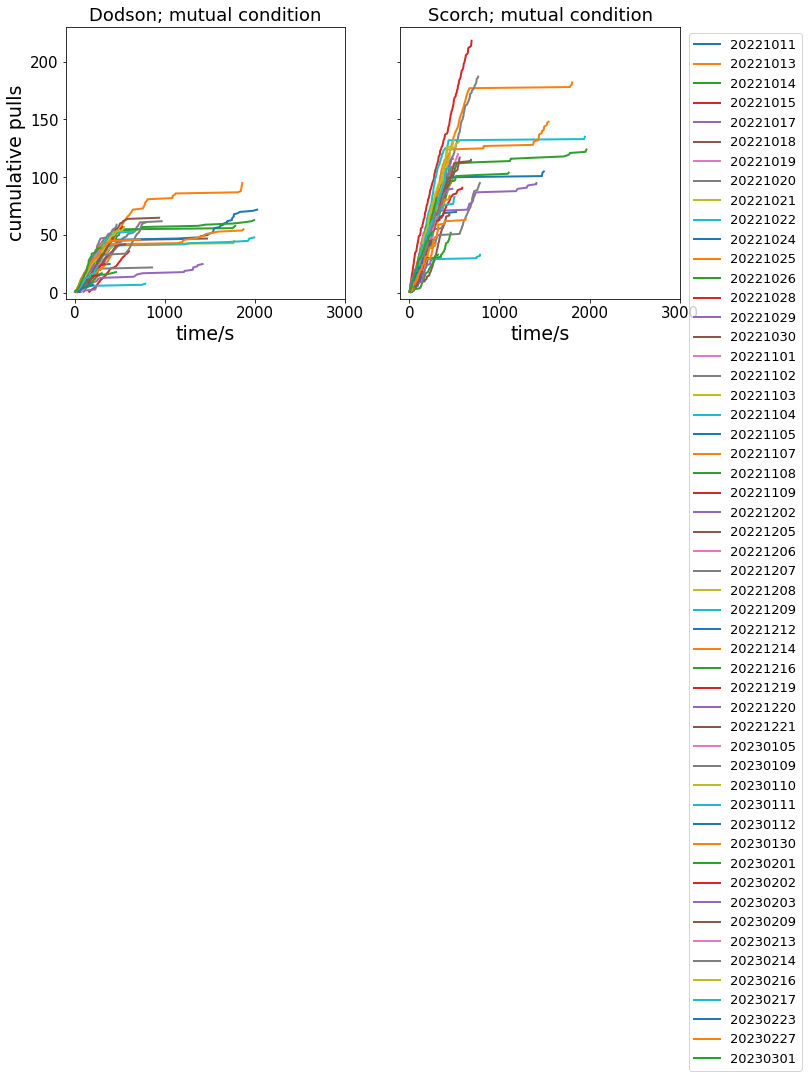

In [41]:
# plot for mutual condition
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(11)
#
for ii in np.arange(0,n_mutual_sessions,1):
    xxx = cumulative_pulls_animal1_mutual[mutual_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal1_mutual[mutual_session_days[ii]])[0]+1,1)
    axs[0].plot(xxx,yyy,linewidth=2)
    xxx = cumulative_pulls_animal2_mutual[mutual_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal2_mutual[mutual_session_days[ii]])[0]+1,1)
    axs[1].plot(xxx,yyy,linewidth=2)
axs[0].set_title(animal1_name+"; mutual condition",fontsize = 18)
axs[0].set_ylim([-5,230])
axs[0].set_xlim([-100,3000])
axs[0].set_xlabel("time/s",fontsize = 19)
axs[0].set_ylabel("cumulative pulls",fontsize = 19)
axs[0].tick_params(labelsize = 15)
axs[1].set_title(animal2_name+"; mutual condition",fontsize = 18)    
axs[1].set_ylim([-5,230])
axs[1].set_xlim([-100,3000])
axs[1].set_xlabel("time/s",fontsize = 19)
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=mutual_session_days, fontsize = 13,bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig("cumulative_pulling_mutual.png")

### cumulative pulling results  - separating animals

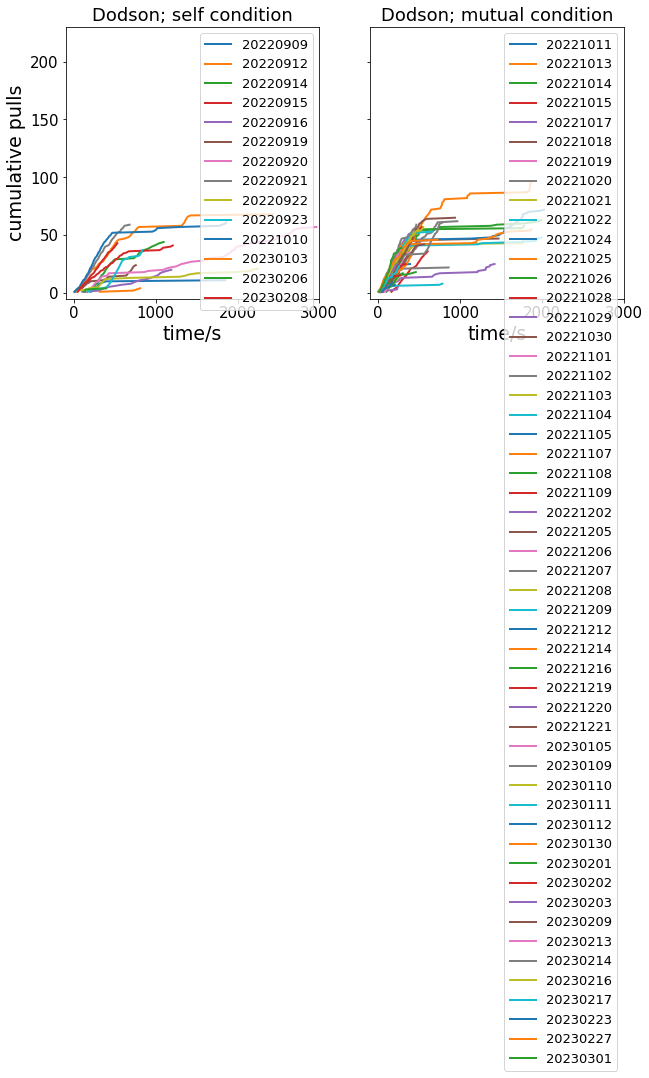

In [42]:
# plot for animal1
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
#
for ii in np.arange(0,n_self_sessions,1):
    xxx = cumulative_pulls_animal1_self[self_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal1_self[self_session_days[ii]])[0]+1,1)
    axs[0].plot(xxx,yyy,linewidth=2)
for ii in np.arange(0,n_mutual_sessions,1): 
    xxx = cumulative_pulls_animal1_mutual[mutual_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal1_mutual[mutual_session_days[ii]])[0]+1,1)
    axs[1].plot(xxx,yyy,linewidth=2)
axs[0].set_title(animal1_name+"; self condition",fontsize = 18)
axs[0].set_ylim([-5,230])
axs[0].set_xlim([-100,3000])
axs[0].set_xlabel("time/s",fontsize = 19)
axs[0].set_ylabel("cumulative pulls",fontsize = 19)
axs[0].tick_params(labelsize = 15)
axs[0].legend(labels=self_session_days, fontsize = 13)
axs[1].set_title(animal1_name+"; mutual condition",fontsize = 18)    
axs[1].set_ylim([-5,230])
axs[1].set_xlim([-100,3000])
axs[1].set_xlabel("time/s",fontsize = 19)
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=mutual_session_days, fontsize = 13)

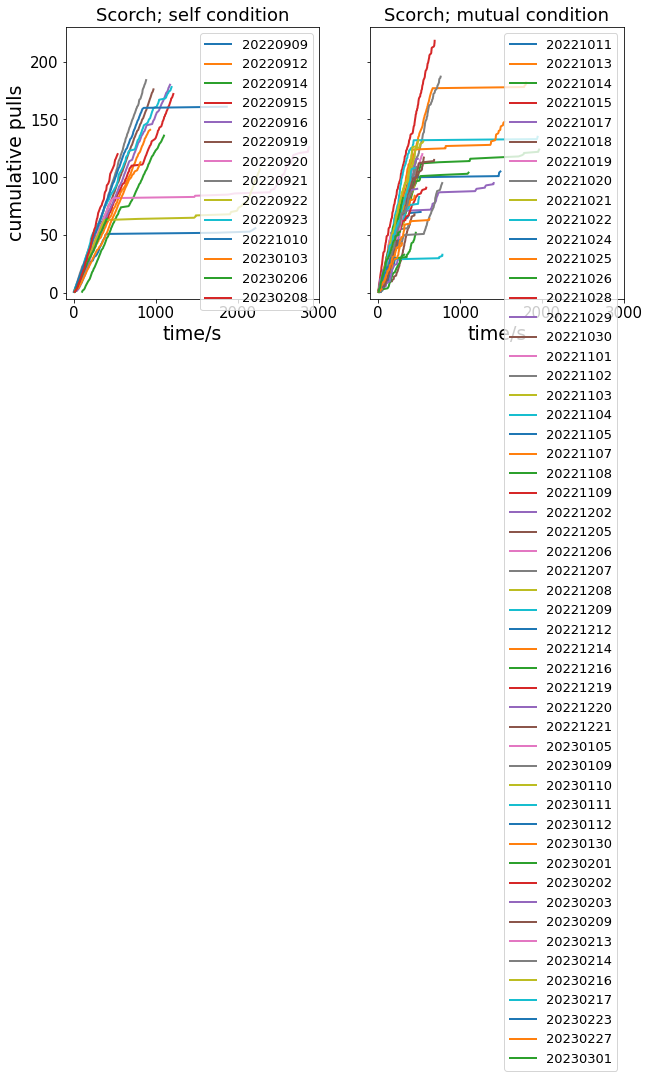

In [43]:
# plot for animal2
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
#
for ii in np.arange(0,n_self_sessions,1):
    xxx = cumulative_pulls_animal2_self[self_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal2_self[self_session_days[ii]])[0]+1,1)
    axs[0].plot(xxx,yyy,linewidth=2)
for ii in np.arange(0,n_mutual_sessions,1): 
    xxx = cumulative_pulls_animal2_mutual[mutual_session_days[ii]]
    yyy = np.arange(1,np.shape(cumulative_pulls_animal2_mutual[mutual_session_days[ii]])[0]+1,1)
    axs[1].plot(xxx,yyy,linewidth=2)
axs[0].set_title(animal2_name+"; self condition",fontsize = 18)
axs[0].set_ylim([-5,230])
axs[0].set_xlim([-100,3000])
axs[0].set_xlabel("time/s",fontsize = 19)
axs[0].set_ylabel("cumulative pulls",fontsize = 19)
axs[0].tick_params(labelsize = 15)
axs[0].legend(labels=self_session_days, fontsize = 13)
axs[1].set_title(animal2_name+"; mutual condition",fontsize = 18)    
axs[1].set_ylim([-5,230])
axs[1].set_xlim([-100,3000])
axs[1].set_xlabel("time/s",fontsize = 19)
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=mutual_session_days, fontsize = 13)

### cooperative pull counts

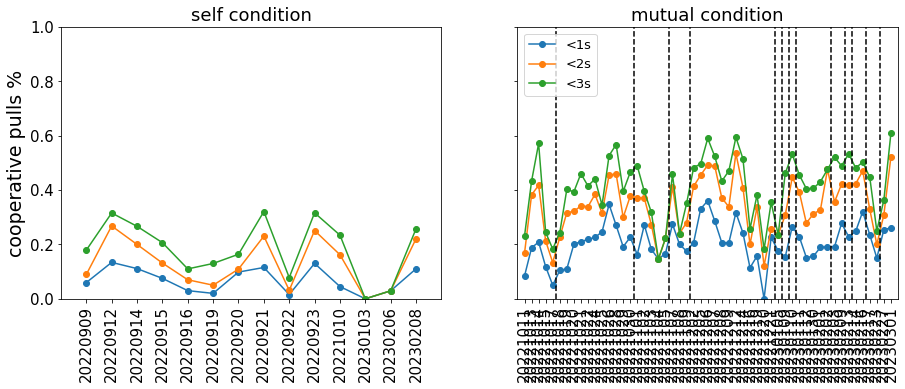

In [44]:
# plot for self condition and mutual condition
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
#
# find out when the task type and cooperation threshold change
self_change_types = np.where((coopthres_all_self[0][1:]-coopthres_all_self[0][0:-1])!=0)
mutual_change_types = np.where((coopthres_all_mutual[0][1:]-coopthres_all_mutual[0][0:-1])!=0)
#
xxx = np.arange(0,n_self_sessions,1)
axs[0].plot(xxx,coop_pulls_num_1s_self[0],'o-')
axs[0].plot(xxx,coop_pulls_num_2s_self[0],'o-')
axs[0].plot(xxx,coop_pulls_num_3s_self[0],'o-')
axs[0].set_title("self condition",fontsize = 18)
axs[0].set_ylim([0,1])
axs[0].set_xlim([-1,n_self_sessions])
axs[0].set_ylabel("cooperative pulls %",fontsize = 19)
axs[0].set_xticks(xxx)
axs[0].set_xticklabels(self_session_days,rotation = 90)
axs[0].tick_params(labelsize = 15)

xxx = np.arange(0,n_mutual_sessions,1)
axs[1].plot(xxx,coop_pulls_num_1s_mutual[0],'o-')
axs[1].plot(xxx,coop_pulls_num_2s_mutual[0],'o-')
axs[1].plot(xxx,coop_pulls_num_3s_mutual[0],'o-')
axs[1].set_title("mutual condition",fontsize = 18)
axs[1].set_ylim([0,1])
axs[1].set_xlim([-1,n_mutual_sessions])
axs[1].set_yticklabels("")
axs[1].set_xticks(xxx)
axs[1].set_xticklabels(mutual_session_days,rotation = 90)
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=['<1s','<2s','<3s'], fontsize = 13)
#
nchangetypes_mutual = np.shape(mutual_change_types)[0]
if nchangetypes_mutual>0:
    for ichangetype in mutual_change_types:
        axs[1].plot([ichangetype+0.5, ichangetype+0.5],[0,1],'k--')
#

# plt.savefig("coop_pulls_self_and_mutual.png")

In [45]:
mutual_change_types

(array([ 4, 15, 20, 23, 35, 36, 37, 38, 43, 45, 46, 48, 50]),)

### successful rates for mutual cooperation condition

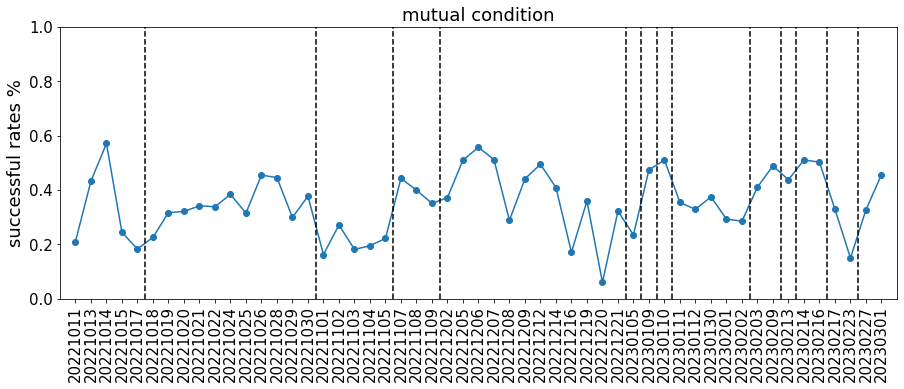

In [46]:
fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(15)
#
xxx = np.arange(0,n_mutual_sessions,1)
axs.plot(xxx,succ_rate_all_mutual[0],'o-')
axs.set_title("mutual condition",fontsize = 18)
axs.set_ylim([0,1])
axs.set_xlim([-1,n_mutual_sessions])
axs.set_ylabel("successful rates %",fontsize = 18)
axs.set_xticks(xxx)
axs.set_xticklabels(mutual_session_days,rotation = 90)
axs.tick_params(labelsize = 15)
#
nchangetypes_mutual = np.shape(mutual_change_types)[0]
if nchangetypes_mutual>0:
    for ichangetype in mutual_change_types:
        axs.plot([ichangetype+0.5, ichangetype+0.5],[0,1],'k--')

### inter-pull interval

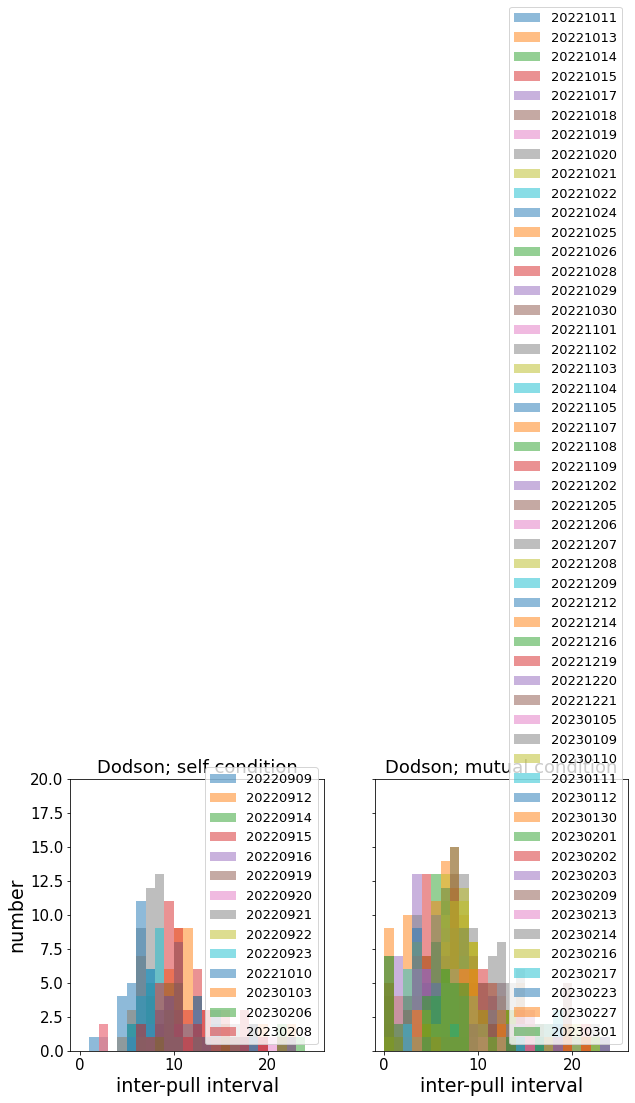

In [47]:
# animal1 inter-pull interval
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
#
mean_interpull_interval_self = []
mean_interpull_interval_mutual = []
#
for ii in np.arange(0,n_self_sessions,1):
    interpull_interval = []
    xxx = cumulative_pulls_animal1_self[self_session_days[ii]]
    next_pull = xxx[np.arange(1,np.shape(xxx)[0],1)].reset_index(drop=True) 
    first_pull = xxx[np.arange(0,np.shape(xxx)[0]-1,1)].reset_index(drop=True)
    interpull_interval = next_pull - first_pull
    interpull_interval = interpull_interval[interpull_interval<1000]
    #
    axs[0].hist(interpull_interval,alpha=0.5, bins=np.arange(0,25,1))
    #
    mean_interpull_interval_self.append(np.mean(interpull_interval))
#
for ii in np.arange(0,n_mutual_sessions,1):
    interpull_interval = []
    xxx = cumulative_pulls_animal1_mutual[mutual_session_days[ii]]
    next_pull = xxx[np.arange(1,np.shape(xxx)[0],1)].reset_index(drop=True) 
    first_pull = xxx[np.arange(0,np.shape(xxx)[0]-1,1)].reset_index(drop=True)
    interpull_interval = next_pull - first_pull
    interpull_interval = interpull_interval[interpull_interval<1000]
    #
    axs[1].hist(interpull_interval, alpha=0.5,bins=np.arange(0,25,1))  
    #
    mean_interpull_interval_mutual.append(np.mean(interpull_interval))
#
axs[0].set_title(animal1_name+"; self condition",fontsize = 18)
axs[0].set_xlabel("inter-pull interval",fontsize = 19)
axs[0].set_ylabel("number",fontsize = 19)
axs[0].set_xlim([-1,26])
axs[0].set_ylim([0,20])
axs[0].tick_params(labelsize = 15)
axs[0].legend(labels=self_session_days, fontsize = 13)
axs[1].set_title(animal1_name+"; mutual condition",fontsize = 18)
axs[1].set_xlabel("inter-pull interval",fontsize = 19)
axs[1].set_ylabel("")
axs[1].set_xlim([-1,26])
axs[1].set_ylim([0,20])
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=mutual_session_days, fontsize = 13)

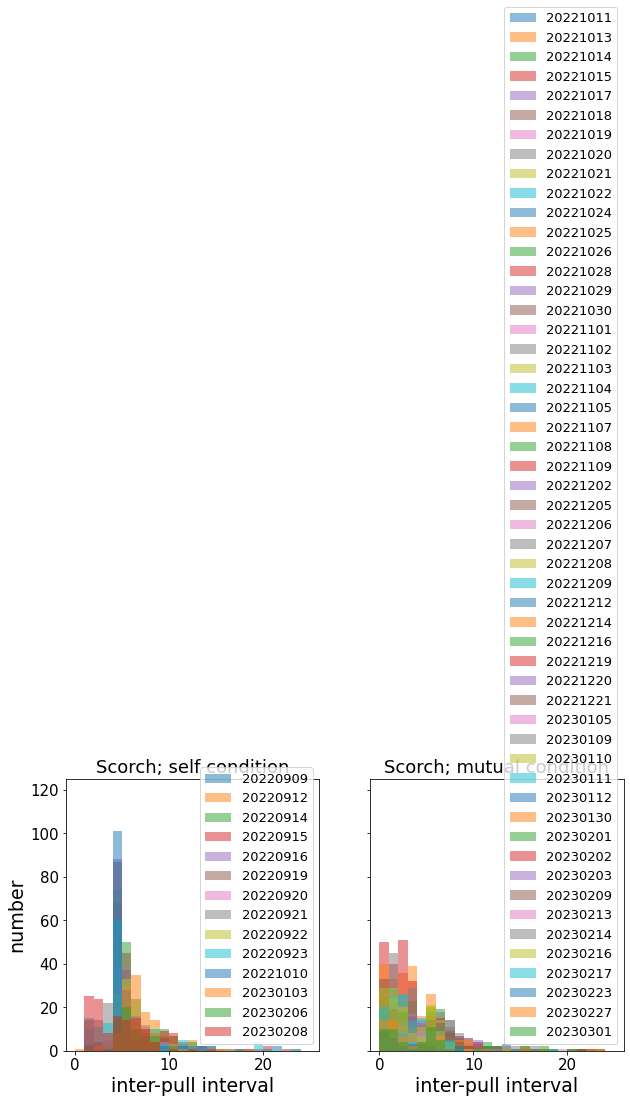

In [48]:
# animal2 inter-pull interval
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
#
mean_interpull_interval_self = []
mean_interpull_interval_mutual = []
#
for ii in np.arange(0,n_self_sessions,1):
    interpull_interval = []
    xxx = cumulative_pulls_animal2_self[self_session_days[ii]]
    next_pull = xxx[np.arange(1,np.shape(xxx)[0],1)].reset_index(drop=True) 
    first_pull = xxx[np.arange(0,np.shape(xxx)[0]-1,1)].reset_index(drop=True)
    interpull_interval = next_pull - first_pull
    interpull_interval = interpull_interval[interpull_interval<1000]
    #
    axs[0].hist(interpull_interval,alpha=0.5, bins=np.arange(0,25,1))
    #
    mean_interpull_interval_self.append(np.mean(interpull_interval))
#
for ii in np.arange(0,n_mutual_sessions,1):
    interpull_interval = []
    xxx = cumulative_pulls_animal2_mutual[mutual_session_days[ii]]
    next_pull = xxx[np.arange(1,np.shape(xxx)[0],1)].reset_index(drop=True) 
    first_pull = xxx[np.arange(0,np.shape(xxx)[0]-1,1)].reset_index(drop=True)
    interpull_interval = next_pull - first_pull
    interpull_interval = interpull_interval[interpull_interval<1000]
    #
    axs[1].hist(interpull_interval, alpha=0.5, bins=np.arange(0,25,1))  
    #
    mean_interpull_interval_mutual.append(np.mean(interpull_interval))
#
axs[0].set_title(animal2_name+"; self condition",fontsize = 18)
axs[0].set_xlabel("inter-pull interval",fontsize = 19)
axs[0].set_ylabel("number",fontsize = 19)
axs[0].set_xlim([-1,26])
axs[0].set_ylim([0,125])
axs[0].tick_params(labelsize = 15)
axs[0].legend(labels=self_session_days, fontsize = 13)
axs[1].set_title(animal2_name+"; mutual condition",fontsize = 18)
axs[1].set_xlabel("inter-pull interval",fontsize = 19)
axs[1].set_ylabel("")
axs[1].set_xlim([-1,26])
axs[1].set_ylim([0,125])
axs[1].set_yticklabels("")
axs[1].tick_params(labelsize = 15)
axs[1].legend(labels=mutual_session_days, fontsize = 13)